In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import pandas as pd
import seaborn as sns

In [29]:
path = r'Salary_dataset.csv'

data = pd.read_csv(path)
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [30]:
data = data.drop(data.columns[0], axis=1)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


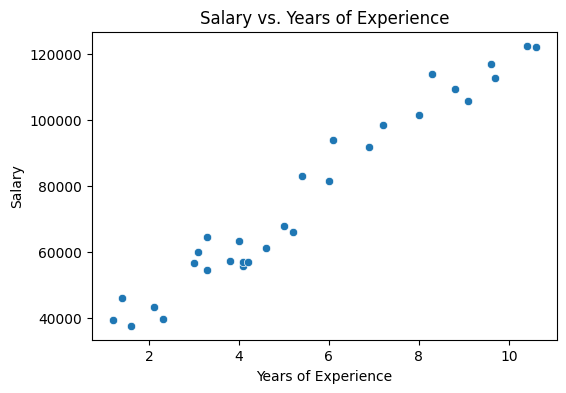

In [31]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='YearsExperience', y='Salary', data=data)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [32]:
from torch.utils.data import Dataset, DataLoader

class SalaryDataset(Dataset):
    def __init__(self, dataframe, target_column='Salary'):
        self.dataframe = data
        self.target_column = target_column
        self.features = dataframe.drop(columns=[target_column]).values
        self.targets = dataframe[target_column].values
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        feature = self.features[idx]
        target = self.targets[idx]
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

train_T, test_T = torch.utils.data.random_split(SalaryDataset(data), [28, 2])

train_loader = DataLoader(train_T, batch_size=7, shuffle=True)
test_loader = DataLoader(test_T, batch_size=7, shuffle=False)

In [33]:
class Regression(nn.Module):
    def __init__(self, in_dims, out_dims):
        super(Regression, self).__init__()
        self.fc1 = nn.Linear(1, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        
        return x

model = Regression(1, 1)

In [34]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

epochs = 1000
lossL = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for features, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * features.size(0)
        
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')
    lossL.append(epoch_loss)
    
model.eval()
with torch.no_grad():
    total_loss = 0.0
    for features, targets in test_loader:
        outputs = model(features)
        loss = criterion(outputs.squeeze(), targets)
        total_loss += loss.item() * features.size(0)
        
        # Print actual vs. predicted values
        print(f'Features: {features.squeeze().tolist()}')
        print(f'Actual Targets: {targets.tolist()}')
        print(f'Predicted Outputs: {outputs.squeeze().tolist()}')
    
    test_loss = total_loss / len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')

Epoch [1/1000], Loss: 1973494652.0000
Epoch [2/1000], Loss: 132228612.0000
Epoch [3/1000], Loss: 137067302.0000
Epoch [4/1000], Loss: 140364750.0000
Epoch [5/1000], Loss: 122696160.0000
Epoch [6/1000], Loss: 146029698.0000
Epoch [7/1000], Loss: 119888910.0000
Epoch [8/1000], Loss: 117083854.0000
Epoch [9/1000], Loss: 118064377.0000
Epoch [10/1000], Loss: 115908587.0000
Epoch [11/1000], Loss: 112177178.0000
Epoch [12/1000], Loss: 106481316.0000
Epoch [13/1000], Loss: 105110608.0000
Epoch [14/1000], Loss: 100219493.0000
Epoch [15/1000], Loss: 98296895.0000
Epoch [16/1000], Loss: 95999356.0000
Epoch [17/1000], Loss: 93069274.0000
Epoch [18/1000], Loss: 97638755.0000
Epoch [19/1000], Loss: 97272075.0000
Epoch [20/1000], Loss: 96101226.0000
Epoch [21/1000], Loss: 87720684.5000
Epoch [22/1000], Loss: 84523064.5000
Epoch [23/1000], Loss: 86432577.0000
Epoch [24/1000], Loss: 85786553.0000
Epoch [25/1000], Loss: 82980141.0000
Epoch [26/1000], Loss: 84376867.0000
Epoch [27/1000], Loss: 85410316.

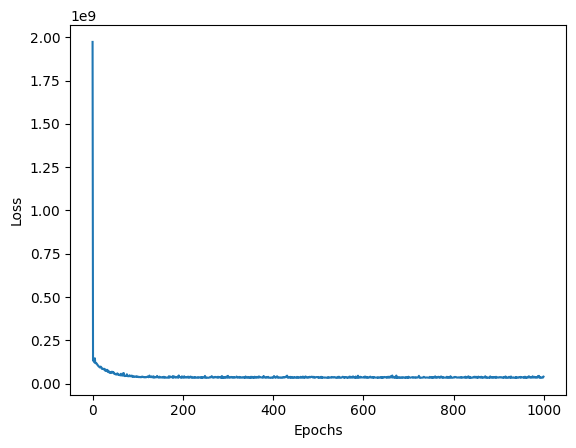

In [36]:
plt.plot(range(epochs), lossL)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

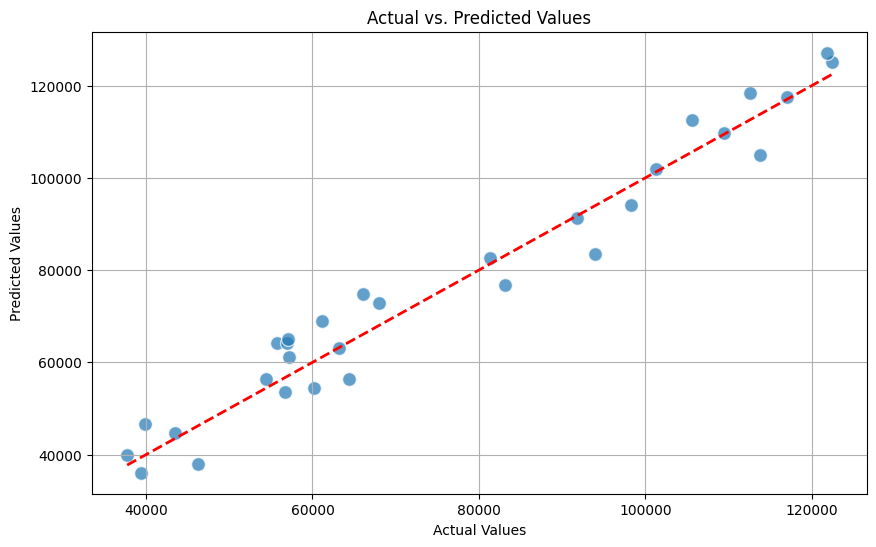

In [39]:
dataset = SalaryDataset(data)
dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)

model.eval()

all_predictions = []
all_actuals = []

with torch.no_grad():
    for features, targets in dataloader:
        outputs = model(features).squeeze()
        all_predictions.extend(outputs.tolist())
        all_actuals.extend(targets.tolist())

plt.figure(figsize=(10, 6))
plt.scatter(all_actuals, all_predictions, alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)], 'r--', lw=2)  # Line of equality
plt.grid(True)
plt.show()